# Image Segmentation
An image is a collection or set of different pixels. We group together the pixels that have similar attributes using image segmentation.. Thus, the task of image segmentation is to train a neural network to output a pixel-wise mask of the image. This helps in understanding the image at a much lower level, i.e., the pixel level.In image segmetation each pixel is given a label.

Before diving into code, first we will need to import all the required libraries

# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from zipfile import ZipFile 
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# Dataset Preparation

Let's unzip all the files

In [2]:
train_zip = "/kaggle/input/carvana-image-masking-challenge/train.zip"
with ZipFile(train_zip, 'r') as zip_: 
    zip_.extractall('/kaggle/working')
     
print("Train set:  ", len(os.listdir("/kaggle/working/train")))

Train set:   5088


In [3]:
train_mask_zip = "/kaggle/input/carvana-image-masking-challenge/train_masks.zip"
with ZipFile(train_mask_zip, 'r') as zip_: 
    zip_.extractall('/kaggle/working')

print("Train masks:", len(os.listdir("/kaggle/working/train_masks")))

Train masks: 5088


# Creating a DataFrame

In [4]:
car_ids = []
paths = []
for dirname, _, filenames in os.walk('/kaggle/working/train'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        
        car_id = filename.split(".")[0]
        car_ids.append(car_id)

d = {"id": car_ids, "car_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df

,car_path
id,
70b6a79565fe_07,/kaggle/working/train/70b6a79565fe_07.jpg
a2df64508b97_06,/kaggle/working/train/a2df64508b97_06.jpg
4f0397cf7937_11,/kaggle/working/train/4f0397cf7937_11.jpg
48b3f0c936b5_01,/kaggle/working/train/48b3f0c936b5_01.jpg
0eeaf1ff136d_12,/kaggle/working/train/0eeaf1ff136d_12.jpg
...,...
fd9da5d0bb6f_04,/kaggle/working/train/fd9da5d0bb6f_04.jpg
3f8d611822bc_06,/kaggle/working/train/3f8d611822bc_06.jpg
bec93f7ddb19_11,/kaggle/working/train/bec93f7ddb19_11.jpg


In [5]:
car_ids = []
mask_path = []
for dirname, _, filenames in os.walk('/kaggle/working/train_masks'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        mask_path.append(path)
        
        car_id = filename.split(".")[0]
        car_id = car_id.split("_mask")[0]
        car_ids.append(car_id)

        
d = {"id": car_ids,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id')
mask_df

,mask_path
id,
2c57132da7a0_06,/kaggle/working/train_masks/2c57132da7a0_06_ma...
bf92e198d9b6_06,/kaggle/working/train_masks/bf92e198d9b6_06_ma...
b58cc561e560_08,/kaggle/working/train_masks/b58cc561e560_08_ma...
90fdd8932877_08,/kaggle/working/train_masks/90fdd8932877_08_ma...
4e308ad8a254_09,/kaggle/working/train_masks/4e308ad8a254_09_ma...
...,...
304437bad7ff_07,/kaggle/working/train_masks/304437bad7ff_07_ma...
3cb21125f126_01,/kaggle/working/train_masks/3cb21125f126_01_ma...
6bff9e10288e_11,/kaggle/working/train_masks/6bff9e10288e_11_ma...


In [6]:
df["mask_path"] = mask_df["mask_path"]
df

,car_path,mask_path
id,,
70b6a79565fe_07,/kaggle/working/train/70b6a79565fe_07.jpg,/kaggle/working/train_masks/70b6a79565fe_07_ma...
a2df64508b97_06,/kaggle/working/train/a2df64508b97_06.jpg,/kaggle/working/train_masks/a2df64508b97_06_ma...
4f0397cf7937_11,/kaggle/working/train/4f0397cf7937_11.jpg,/kaggle/working/train_masks/4f0397cf7937_11_ma...
48b3f0c936b5_01,/kaggle/working/train/48b3f0c936b5_01.jpg,/kaggle/working/train_masks/48b3f0c936b5_01_ma...
0eeaf1ff136d_12,/kaggle/working/train/0eeaf1ff136d_12.jpg,/kaggle/working/train_masks/0eeaf1ff136d_12_ma...
...,...,...
fd9da5d0bb6f_04,/kaggle/working/train/fd9da5d0bb6f_04.jpg,/kaggle/working/train_masks/fd9da5d0bb6f_04_ma...
3f8d611822bc_06,/kaggle/working/train/3f8d611822bc_06.jpg,/kaggle/working/train_masks/3f8d611822bc_06_ma...
bec93f7ddb19_11,/kaggle/working/train/bec93f7ddb19_11.jpg,/kaggle/working/train_masks/bec93f7ddb19_11_ma...


# Data Augmentation

Now we will perform a simple augmentation of flipping an image and then normalize the image pixel in between 0 and 1

In [7]:
img_size = [256,256]

def data_augmentation(car_img, mask_img):

    if tf.random.uniform(()) > 0.5:
        car_img = tf.image.flip_left_right(car_img)
        mask_img = tf.image.flip_left_right(mask_img)

    return car_img, mask_img

def preprocessing(car_path, mask_path):
    car_img = tf.io.read_file(car_path) 
    car_img = tf.image.decode_jpeg(car_img, channels=3)
    car_img = tf.image.resize(car_img, img_size)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    
    mask_img = tf.io.read_file(mask_path)
    mask_img = tf.image.decode_jpeg(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]    
    mask_img = tf.math.sign(mask_img)
    
    return car_img, mask_img

In [8]:
def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)

    return ds

Now we will split the dataset into train and test

In [11]:
train_df, valid_df = train_test_split(df, test_size=.20, random_state=42)

train = create_dataset(train_df, train = True)
valid = create_dataset(valid_df)

print("Training Set: ",len(train))
print("Validation Set: ",len(valid))

Training Set:  4070
Validation Set:  1018


In [12]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 16
BUFFER_SIZE = 1000

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)

Let's look the image and it's corresponding mask

In [13]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

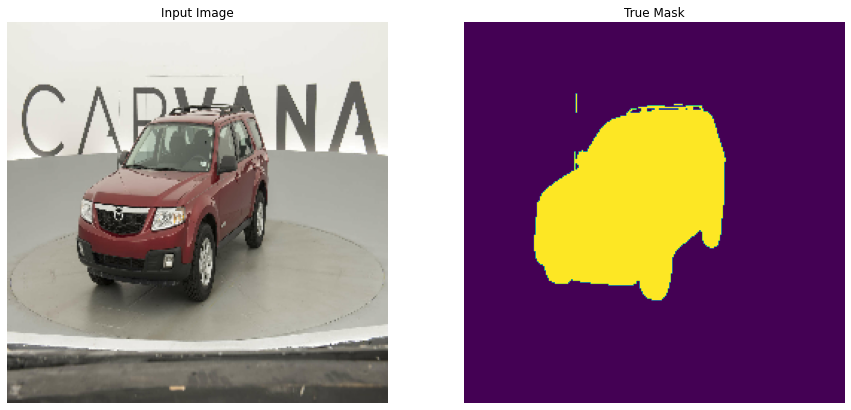

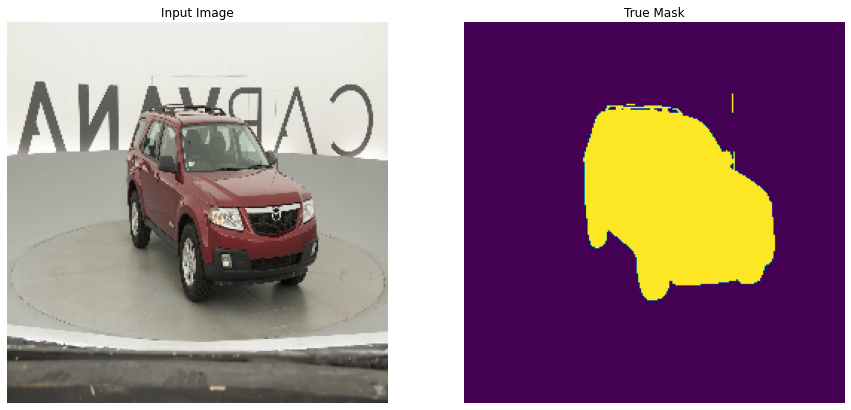

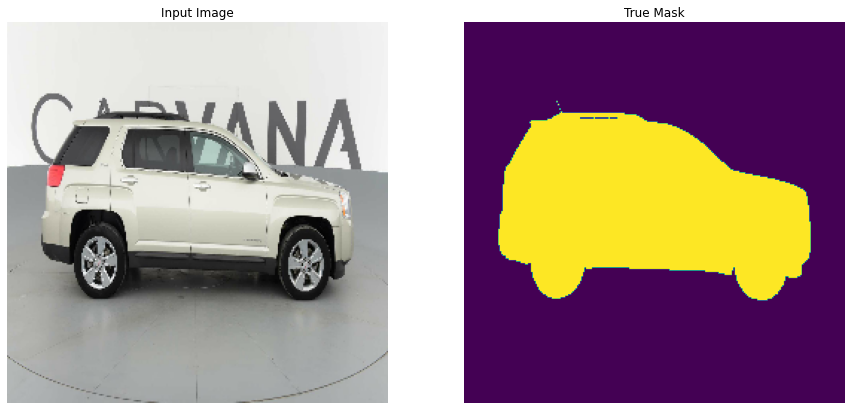

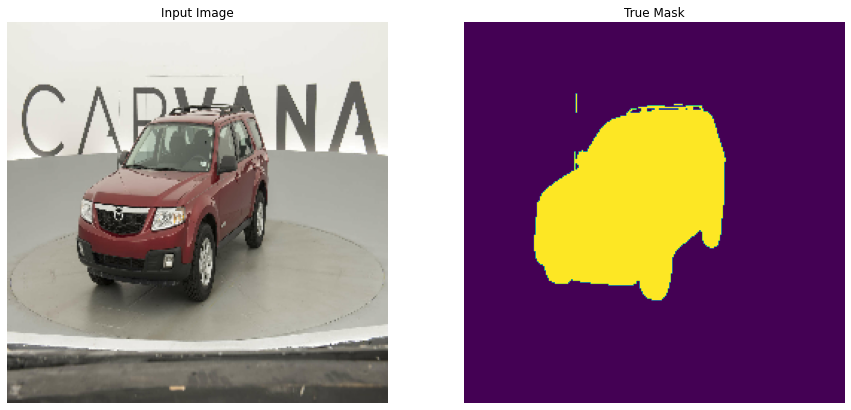

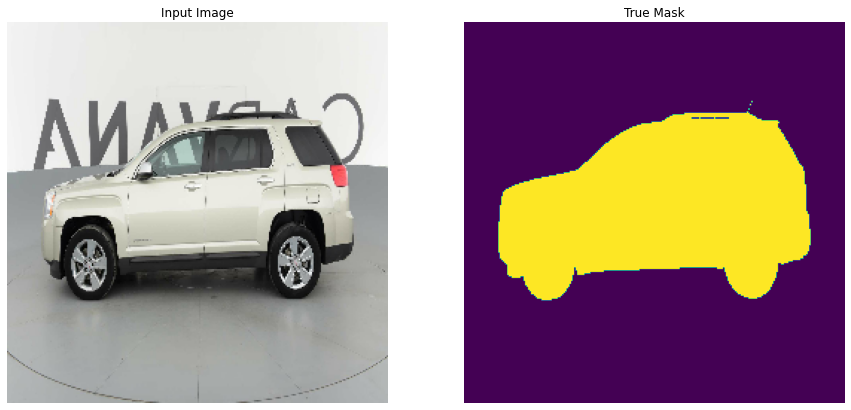

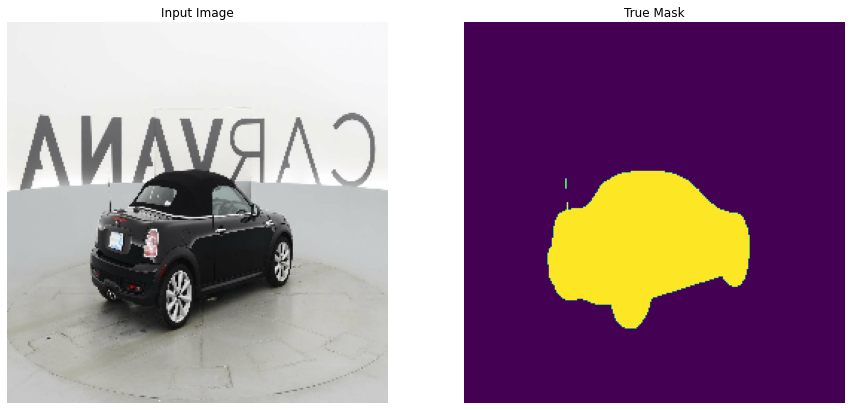

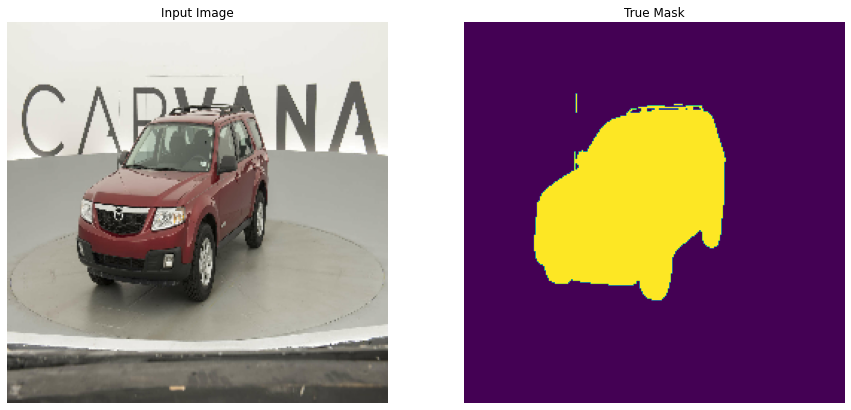

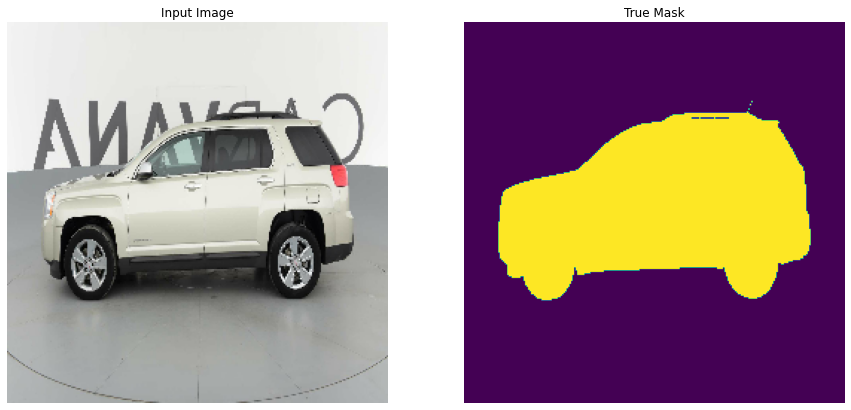

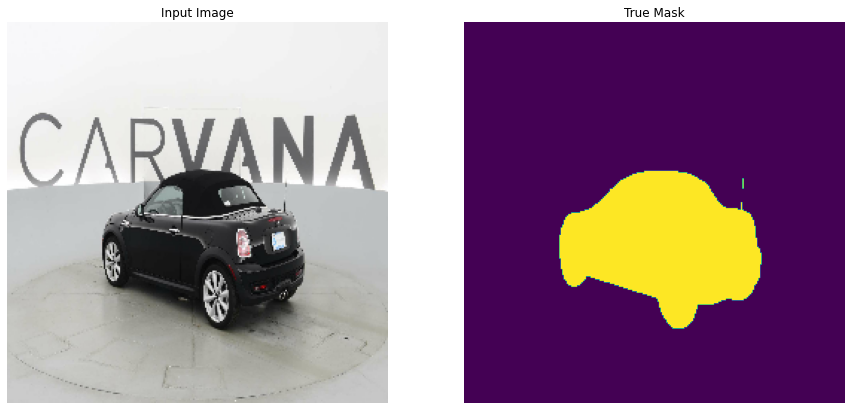

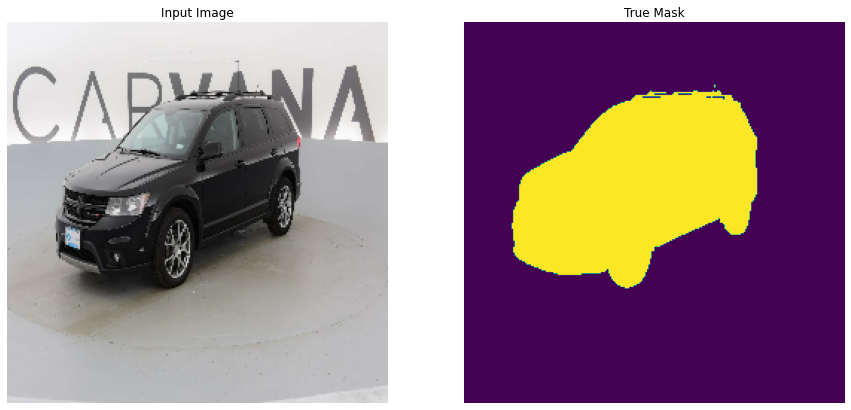

In [14]:
for i in range(5):
    for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

# Model

We are going to use U-Net model. A U-Net consists of an encoder (downsampler) and decoder (upsampler). In-order to learn robust features, and reduce the number of trainable parameters, a pretrained model can be used as the encoder.The encoder will be a pretrained MobileNetV2 model which is prepared and ready to use in tf.keras.applications. 

In [15]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [16]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

In [17]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose( output_channels, 3, strides=2, activation='sigmoid',padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

# Train the Model

Now let's compile the model and see the model architecture

In [24]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)


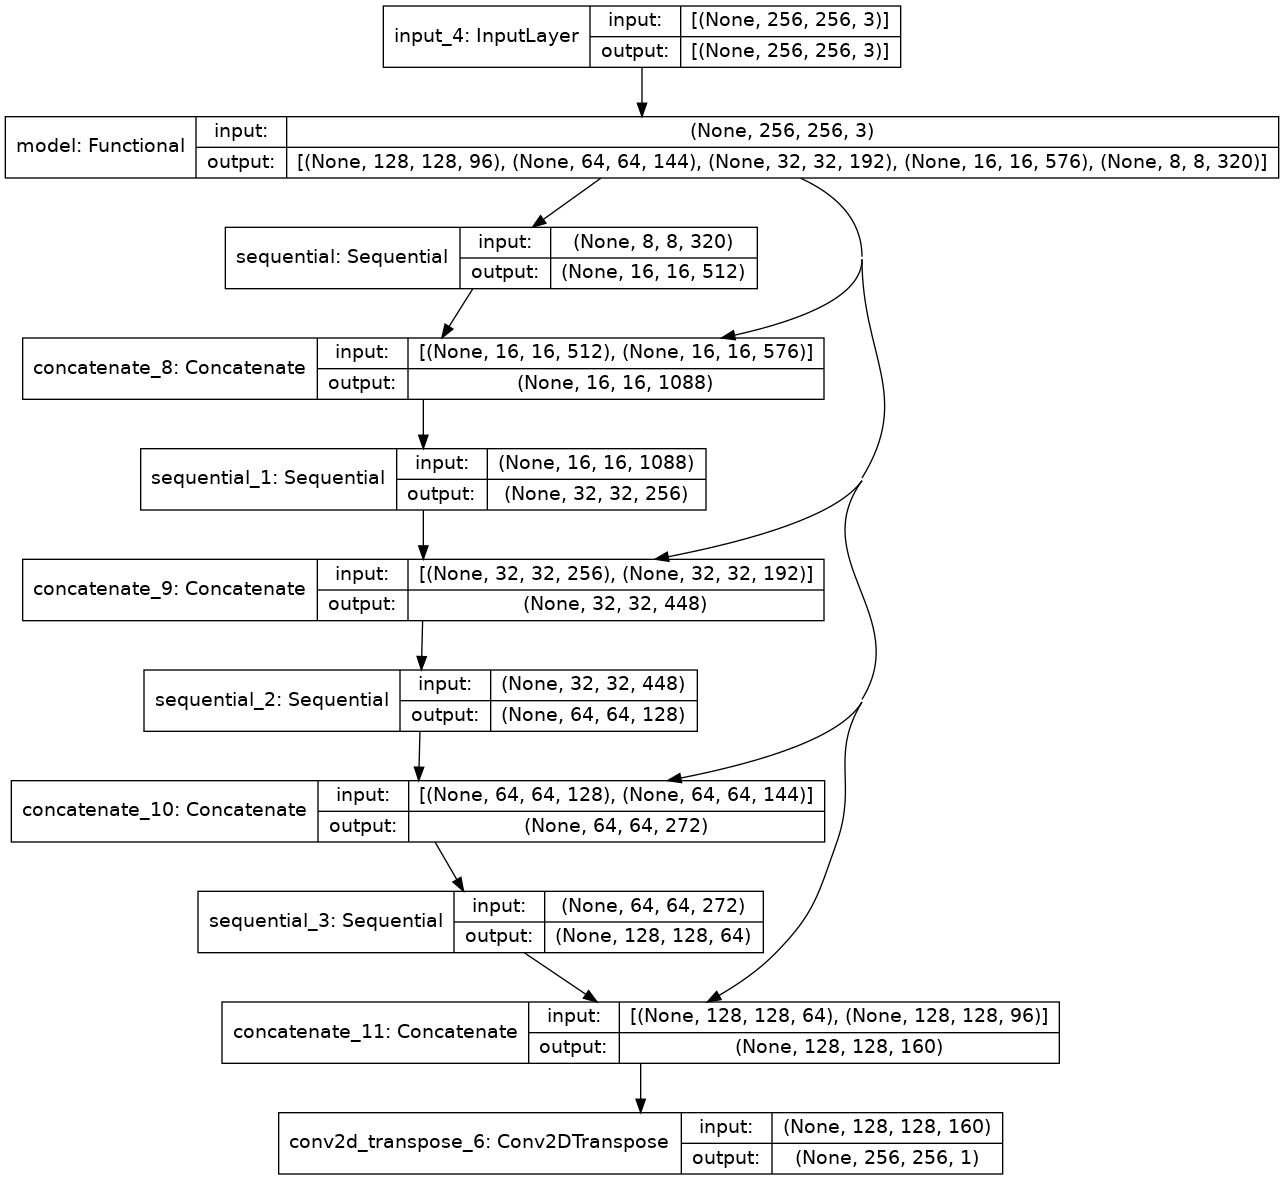

In [26]:
model = unet_model(1)

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics=[dice_coef,'binary_accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True)

Let's try out the model to see what it predicts before training.

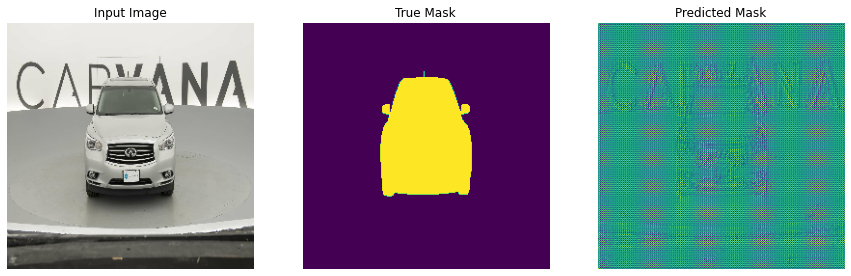

In [27]:
for images, masks in train_dataset.take(1):
    for img, mask in zip(images, masks):
        sample_image = img
        sample_mask = mask
        break
        
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask])
    
show_predictions(sample_image, sample_mask)

In [28]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
model (Functional)              [(None, 128, 128, 96 1841984     input_4[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, 16, 16, 512)  1476608     model[2][4]                      
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 16, 16, 1088) 0           sequential[2][0]                 
                                                                 model[2][3]                

Let's observe how the model improves while it is training. To accomplish this task, a callback function is defined below.

Epoch 1/15
254/254 [==============================] - 125s 394ms/step - loss: 0.1563 - dice_coef: 0.8437 - binary_accuracy: 0.9214 - val_loss: 0.0290 - val_dice_coef: 0.9710 - val_binary_accuracy: 0.9900
Epoch 2/15
254/254 [==============================] - 40s 157ms/step - loss: 0.0252 - dice_coef: 0.9748 - binary_accuracy: 0.9910 - val_loss: 0.0230 - val_dice_coef: 0.9771 - val_binary_accuracy: 0.9914
Epoch 3/15


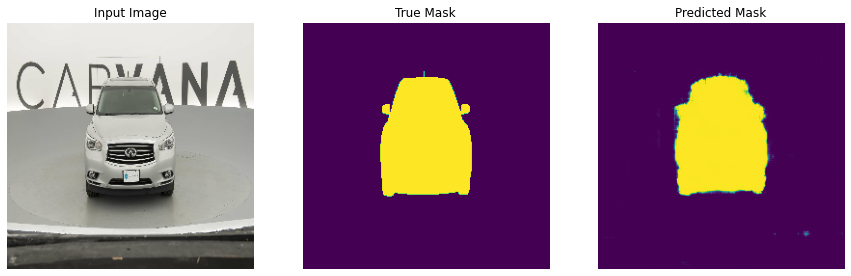

254/254 [==============================] - 40s 156ms/step - loss: 0.0219 - dice_coef: 0.9781 - binary_accuracy: 0.9918 - val_loss: 0.0206 - val_dice_coef: 0.9794 - val_binary_accuracy: 0.9920
Epoch 4/15
254/254 [==============================] - 39s 154ms/step - loss: 0.0204 - dice_coef: 0.9797 - binary_accuracy: 0.9922 - val_loss: 0.0197 - val_dice_coef: 0.9803 - val_binary_accuracy: 0.9922
Epoch 5/15
254/254 [==============================] - 39s 156ms/step - loss: 0.0195 - dice_coef: 0.9805 - binary_accuracy: 0.9923 - val_loss: 0.0197 - val_dice_coef: 0.9804 - val_binary_accuracy: 0.9921
Epoch 6/15


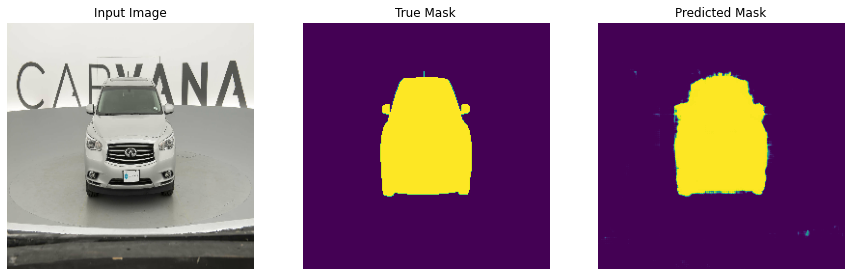

254/254 [==============================] - 40s 156ms/step - loss: 0.0190 - dice_coef: 0.9809 - binary_accuracy: 0.9925 - val_loss: 0.0186 - val_dice_coef: 0.9814 - val_binary_accuracy: 0.9925
Epoch 7/15
254/254 [==============================] - 39s 156ms/step - loss: 0.0185 - dice_coef: 0.9815 - binary_accuracy: 0.9926 - val_loss: 0.0182 - val_dice_coef: 0.9818 - val_binary_accuracy: 0.9926
Epoch 8/15
254/254 [==============================] - 39s 155ms/step - loss: 0.0180 - dice_coef: 0.9820 - binary_accuracy: 0.9926 - val_loss: 0.0182 - val_dice_coef: 0.9818 - val_binary_accuracy: 0.9926
Epoch 9/15


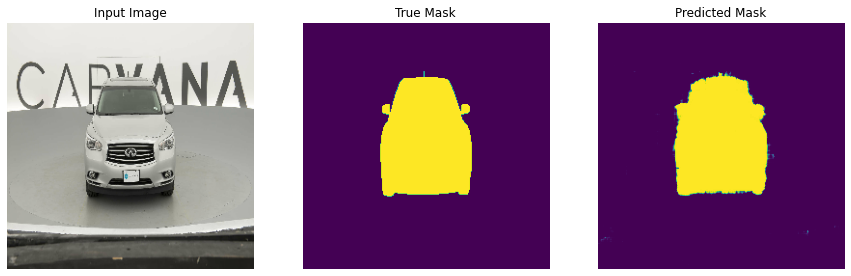

254/254 [==============================] - 39s 154ms/step - loss: 0.0177 - dice_coef: 0.9823 - binary_accuracy: 0.9928 - val_loss: 0.0195 - val_dice_coef: 0.9805 - val_binary_accuracy: 0.9920
Epoch 10/15
254/254 [==============================] - 40s 156ms/step - loss: 0.0177 - dice_coef: 0.9823 - binary_accuracy: 0.9929 - val_loss: 0.0178 - val_dice_coef: 0.9822 - val_binary_accuracy: 0.9927
Epoch 11/15
254/254 [==============================] - 39s 156ms/step - loss: 0.0174 - dice_coef: 0.9826 - binary_accuracy: 0.9929 - val_loss: 0.0186 - val_dice_coef: 0.9814 - val_binary_accuracy: 0.9923
Epoch 12/15


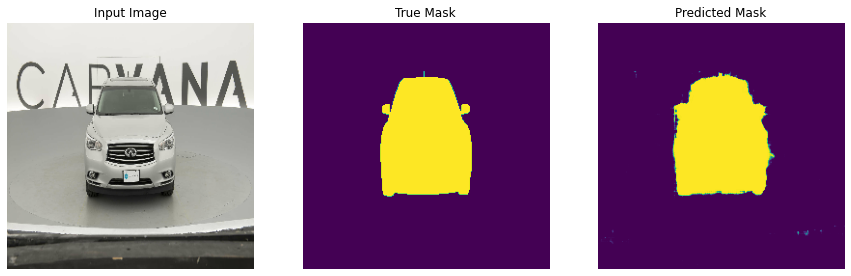

254/254 [==============================] - 40s 157ms/step - loss: 0.0171 - dice_coef: 0.9829 - binary_accuracy: 0.9930 - val_loss: 0.0176 - val_dice_coef: 0.9824 - val_binary_accuracy: 0.9927
Epoch 13/15
254/254 [==============================] - 39s 153ms/step - loss: 0.0170 - dice_coef: 0.9831 - binary_accuracy: 0.9930 - val_loss: 0.0178 - val_dice_coef: 0.9822 - val_binary_accuracy: 0.9926
Epoch 14/15
254/254 [==============================] - 39s 155ms/step - loss: 0.0168 - dice_coef: 0.9832 - binary_accuracy: 0.9931 - val_loss: 0.0175 - val_dice_coef: 0.9825 - val_binary_accuracy: 0.9928
Epoch 15/15


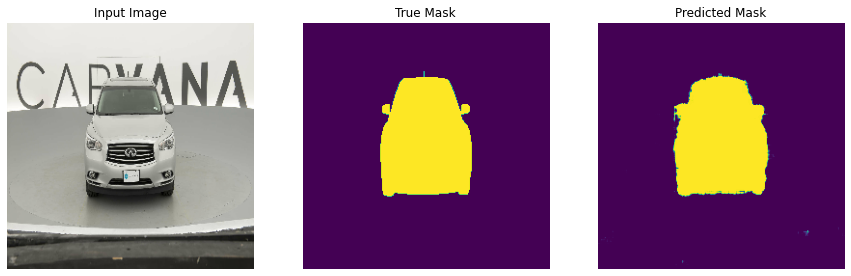

254/254 [==============================] - 40s 156ms/step - loss: 0.0166 - dice_coef: 0.9834 - binary_accuracy: 0.9931 - val_loss: 0.0173 - val_dice_coef: 0.9827 - val_binary_accuracy: 0.9928


In [29]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 3 == 0:
            show_predictions(sample_image, sample_mask)
EPOCHS = 15
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                          callbacks=[DisplayCallback(), early_stop])

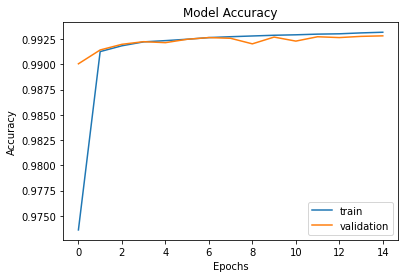

In [31]:
plt.plot(model_history.history['binary_accuracy'])
plt.plot(model_history.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

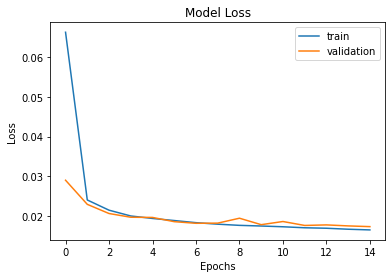

In [32]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()